In [106]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [107]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


# Data Visualization

In [109]:
Rental.describe() #shows a summary of the numerical attributes


,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261936.000000,45041.0,268849.000000,267029.000000,235509.000000,2.283470e+05,211813.000000,2.688490e+05,93037.000000,211813.000000,...,268849.000000,162328.000000,217528.000000,171091.000000,268849.000000,268849.000000,85518.000000,80696.000000,46787.000000,46787.000000
mean,151.208704,10.0,9.791876,3.387949,28.804855,9.012967e+02,1966.395797,1.069697e+08,1.327128,3.714597,...,2.641872,114.734794,2.122357,3.572421,2.571477,3.070664,77.009232,2013.908942,89.112362,0.199762
std,308.308381,0.0,6.406189,1.964906,16.336629,3.323732e+04,47.052530,1.250095e+07,8.360360,2.738214,...,2.665693,61.636095,3.634880,6.376146,0.937624,1.407012,147.726834,10.960901,5.397662,0.009662
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.699950e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [110]:
Rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268849 entries, 0 to 268848
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268849 non-null  object 
 1   serviceCharge             261936 non-null  float64
 2   heatingType               224005 non-null  object 
 3   telekomTvOffer            236250 non-null  object 
 4   telekomHybridUploadSpeed  45041 non-null   float64
 5   newlyConst                268849 non-null  bool   
 6   balcony                   268849 non-null  bool   
 7   picturecount              268849 non-null  int64  
 8   pricetrend                267029 non-null  float64
 9   telekomUploadSpeed        235509 non-null  float64
 10  totalRent                 228347 non-null  float64
 11  yearConstructed           211813 non-null  float64
 12  scoutId                   268849 non-null  int64  
 13  noParkSpaces              93037 non-null   f

In [111]:
Rental["regio2"].value_counts() # to see how many ditricts have the city Berlin

Leipzig                         13720
Chemnitz                        12576
Berlin                          10406
Dresden                          7524
Magdeburg                        4859
                                ...  
Lichtenfels_Kreis                  31
Freyung_Grafenau_Kreis             30
Haßberge_Kreis                     24
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      12
Name: regio2, Length: 419, dtype: int64

In [112]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin'] # reducing the data set to the city of Berlin
print(Berlin)


        regio1  serviceCharge                     heatingType telekomTvOffer  \
19      Berlin         250.00                   floor_heating  ONE_YEAR_FREE   
48      Berlin         125.00                district_heating  ONE_YEAR_FREE   
85      Berlin         230.00                     gas_heating  ONE_YEAR_FREE   
104     Berlin         105.00                 central_heating  ONE_YEAR_FREE   
151     Berlin         206.00                 central_heating  ONE_YEAR_FREE   
...        ...            ...                             ...            ...   
268729  Berlin         100.00                 central_heating  ONE_YEAR_FREE   
268800  Berlin         350.00                 central_heating  ONE_YEAR_FREE   
268831  Berlin          80.04  self_contained_central_heating  ONE_YEAR_FREE   
268834  Berlin         324.47                 central_heating  ONE_YEAR_FREE   
268848  Berlin         233.08                 central_heating  ONE_YEAR_FREE   

        telekomHybridUploadSpeed  newly

In [113]:
corr_matrix = Berlin.corr()# to find out correlations
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [114]:
Berlin.corr()["baseRent"].sort_values(ascending=False)


baseRent                    1.000000
totalRent                   0.876431
livingSpace                 0.830674
serviceCharge               0.734748
baseRentRange               0.731546
livingSpaceRange            0.704301
noRoomsRange                0.583292
heatingCosts                0.571913
noRooms                     0.475541
picturecount                0.335906
hasKitchen                  0.266178
lift                        0.225659
yearConstructedRange        0.177993
balcony                     0.170298
cellar                      0.122512
newlyConst                  0.118501
garden                      0.106234
floor                       0.072635
yearConstructed             0.056400
numberOfFloors              0.051537
lastRefurbish               0.046471
pricetrend                  0.014995
electricityBasePrice        0.006246
scoutId                    -0.005969
electricityKwhPrice        -0.006246
noParkSpaces               -0.043217
telekomUploadSpeed         -0.079268
t

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

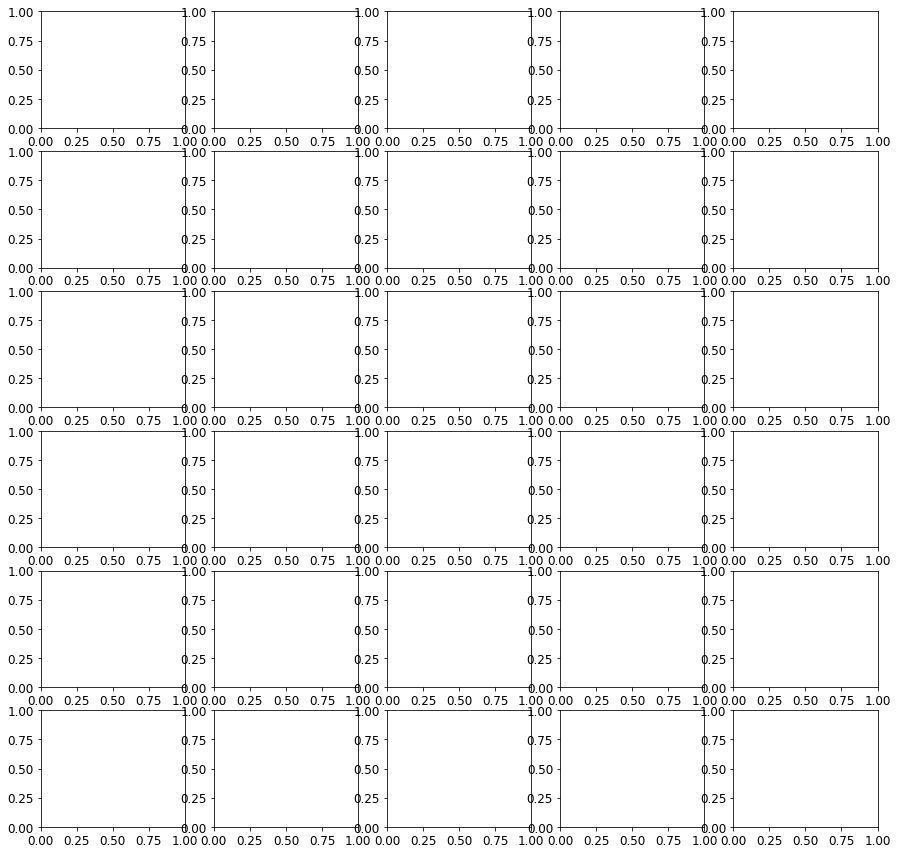

In [115]:
Berlin.hist(bins=50, figsize=(15,15))
plt.show()


In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [ ]:
Berlin["totalRent"].describe()


In [ ]:
plt.plot(np.log(Berlin["totalRent"]))


In [ ]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


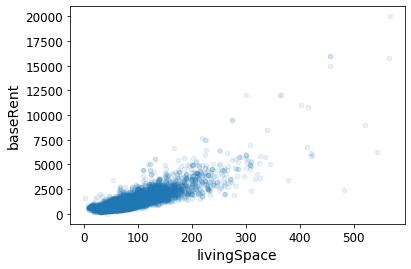

In [116]:
Berlin.plot(kind="scatter", x="livingSpace", y="baseRent", alpha=0.1)


Text(0, 0.5, 'totalRent')

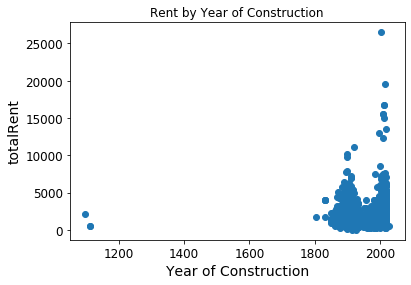

In [117]:
plt.scatter(x='yearConstructed', y='totalRent', data=Berlin)
plt.title('Rent by Year of Construction')
plt.xlabel('Year of Construction')
plt.ylabel('totalRent')

Text(0, 0.5, 'baseRent')

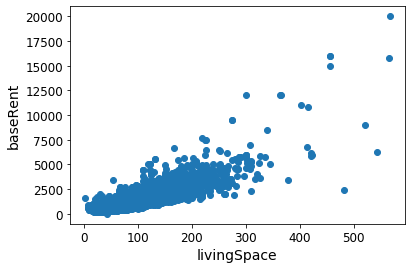

In [118]:
plt.scatter(x='livingSpace', y='baseRent', data=Berlin)
plt.xlabel('livingSpace')
plt.ylabel('baseRent')

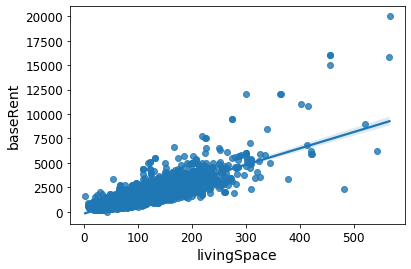

In [119]:
sns.regplot(x='livingSpace', y='baseRent', data=Berlin)

Text(0, 0.5, 'totalRent')

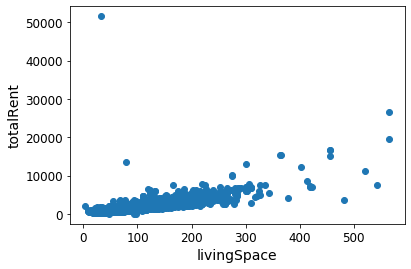

In [120]:
plt.scatter(x='livingSpace', y='totalRent', data=Berlin)
plt.xlabel('livingSpace')
plt.ylabel('totalRent')

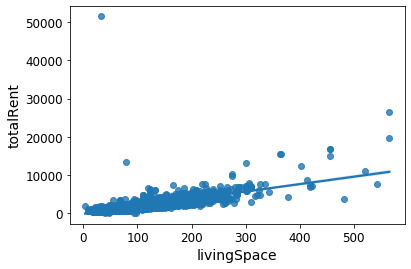

In [121]:
sns.regplot(x='livingSpace', y='totalRent', data=Berlin)

In [122]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

# Feature egineering ( cleaning the data set)

In [123]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")
#Berlin = Berlin[np.isfinite(Berlin['totalRent'])] #drop observations where totalRent isn't available



# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [124]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [125]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']


#Berlin[X_var].replace({False: 0, True: 1}, inplace=True)
y = Berlin[y_var].values
X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)


# Regression Models

In [126]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linearregression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))

linearregression(X_train, y_train, X_test, y_test)


MAE: 0.19574402729645968
MSE: 0.0635228442311826


In [127]:

#RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#Best hyperparamters from the Random Search:
#minsamleaf: 30, maxfeat: 11, maxdepth: 24 

def randomforestreg(msl, mf, md, xtrain, ytrain, xtest, ytest):
    rfr_best = RandomForestRegressor(n_estimators=70, random_state=1111,
                                     max_depth=md, max_features=mf, min_samples_leaf=msl)
    rfr_best.fit(xtrain,ytrain)
    y_pred_rfr = rfr_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rfr))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_rfr))
    
randomforestreg(30, 11, 24, X_train, y_train, X_test, y_test)


/home/feras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


MAE: 0.17667437334857536
MSE: 0.05346448337414117


In [128]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

#Best hyperparameters from Random Search:
#maxdepth: 16, minsamleaf: 117, n: 73, maxfeat: 10, lr: 0.07
def gradientboostingmachine(md, msl, n, mf, lr, xtrain, ytrain, xtest, ytest):
    gbm_best = GradientBoostingRegressor(n_estimators=n, random_state=1111,
                                         max_depth=md, max_features=mf, 
                                         min_samples_leaf=msl, learning_rate=lr
                                         )
    gbm_best.fit(xtrain, ytrain)
    y_pred_gbm = gbm_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_gbm))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_gbm))
    
gradientboostingmachine(16, 117, 73, 10, 0.07, X_train, y_train, X_test, y_test)


/home/feras/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.173812715583208
MSE: 0.0516270301241973


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()


scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())


Mean:		  0.25375394386304634 
Standard Deviation: 0.006884263389833272


In [130]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


/home/feras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/feras/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/feras/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/feras/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: 

In [131]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())


Mean:		  0.23010381280896586 
Standard Deviation: 0.005520256811839601


In [132]:
def stackedmodel(xtrain, ytrain, xtest, ytest):
    x_training, x_valid, y_training, y_valid = train_test_split(xtrain, ytrain,
                                                                test_size=0.5,
                                                                random_state=42)
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=70, random_state=1111,
                                   max_depth=24, max_features=11, 
                                   min_samples_leaf=24)
    model3 = GradientBoostingRegressor(n_estimators=73, random_state=1111,
                                       max_depth=16, max_features=10, 
                                       min_samples_leaf=117, learning_rate=0.07)
    
    model1.fit(x_training, y_training)
    model2.fit(x_training, y_training)
    model3.fit(x_training, y_training)
    
    preds1 = model1.predict(x_valid)
    preds2 = model2.predict(x_valid)
    preds3 = model3.predict(x_valid)
    
    testpreds1 = model1.predict(xtest)
    testpreds2 = model2.predict(xtest)
    testpreds3 = model3.predict(xtest)
    
    stackedpredictions = np.column_stack((preds1, preds2, preds3))
    stackedtestpredictions = np.column_stack((testpreds1, testpreds2,
                                              testpreds3))
    
    metamodel = LinearRegression()
    metamodel.fit(stackedpredictions, y_valid)
    final_predictions = metamodel.predict(stackedtestpredictions)
    print('MAE:', metrics.mean_absolute_error(ytest, final_predictions))
    print('MSE:', metrics.mean_squared_error(ytest, final_predictions))

stackedmodel(X_train, y_train, X_test, y_test)


/home/feras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/feras/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.17505680762549497
MSE: 0.05190116799852566
